In [1]:
#!pip install pandas

In [2]:
#!pip install numpy

In [3]:
#! pip install scikit-learn

In [4]:
#!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------- ------------------------------- 1.6/7.8 MB 9.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.1/7.8 MB 8.4 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 8.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 8.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------------------------------- ------ 1.8/2.2 MB 10.1 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------ --------------- 1.6/2.6 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 9.2 MB/s eta

In [41]:
#!pip install feature_engine

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------ --------------------------------- 1.6/9.9 MB 9.4 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.9 MB 10.5 MB/s eta 0:00:01
   ------------------------ --------------- 6.0/9.9 MB 10.5 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 10.1 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 9.2 MB/s eta 0:00:00


In [52]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
    --------------------------------------- 1.8/124.9 MB 14.4 MB/s eta 0:00:09
   - -------------------------------------- 5.0/124.9 MB 14.4 MB/s eta 0:00:09
   -- ------------------------------------- 8.1/124.9 MB 15.2 MB/s eta 0:00:08
   --- ------------------------------------ 11.3/124.9 MB 15.3 MB/s eta 0:00:08
   ---- ----------------------------------- 14.4/124.9 MB 15.4 MB/s eta 0:00:08
   ----- ---------------------------------- 18.1/124.9 MB 15.8 MB/s eta 0:00:07
   ------ --------------------------------- 21.8/124.9 MB 16.2 MB/s eta 0:00:07
   ------- -------------------------------- 24.6/124.9 MB 15.9 MB/s eta 0:00:07
   -------- ------------------------------- 28.0/124.9 MB 16.0 MB/s eta 0:00:07
   ---------- ----------------------------- 31.5/124.9 MB 16.0 MB/s eta 0:00:06
   ----------- ---------------------------- 34.6/124.9 MB 16.0 MB/s eta 0:00:06
   ------------ --------------------------- 38.0/124

# 1. Importing Libraries

In [109]:
import pandas as pd
import numpy as np
import sklearn
import joblib
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# this is for the datetime processing
from feature_engine.datetime import DatetimeFeatures

# importing models
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# 
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score

# 2. Display Settings

In [8]:
# this will returnds all the columns of the dataframe without truncating the columns
pd.set_option('display.max_columns', None)

In [10]:
# As sklearn imputers are returning the numpyarrays but we are changing it to the pandas array
sklearn.set_config(transform_output='pandas')

# 3. Importing the data

In [14]:
train_df= pd.read_csv('data/train.csv')
val_df= pd.read_csv('data/val.csv')
test_df= pd.read_csv('data/test.csv')

In [15]:
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included,4995
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info,8372
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info,6117
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info,7770
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info,9187
...,...,...,...,...,...,...,...,...,...,...
635,Air Asia,2019-04-12,Banglore,Delhi,04:55:00,07:45:00,170,0.0,No Info,4282
636,Jet Airways,2019-05-09,Kolkata,Banglore,09:35:00,21:05:00,690,1.0,No Info,13067
637,Indigo,2019-05-15,Banglore,Delhi,06:05:00,08:50:00,165,0.0,No Info,4423
638,Multiple Carriers,2019-05-15,Delhi,Cochin,08:45:00,21:00:00,735,1.0,No Info,7670


## 3.1 Spliting the data into dependent and independent variables

In [18]:
def split_data(data):
    X= data.drop(columns='price')
    y= data.price.copy()
    return (X,y)

In [19]:
X_train, y_train = split_data(train_df)

In [20]:
X_train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-06-21,Mumbai,Hyderabad,10:20:00,11:50:00,90,0.0,In-flight meal not included
1,Air India,2019-05-18,Delhi,Cochin,09:00:00,07:40:00,1360,1.0,No Info
2,Air India,2019-06-12,Kolkata,Banglore,09:10:00,11:05:00,1555,2.0,No Info
3,Vistara,2019-04-01,Kolkata,Banglore,20:20:00,22:55:00,1595,1.0,No Info
4,Vistara,2019-06-06,Kolkata,Banglore,17:00:00,10:45:00,1065,1.0,No Info


In [21]:
y_train.head()

0    4995
1    8372
2    6117
3    7770
4    9187
Name: price, dtype: int64

In [30]:
X_train.shape, y_train.shape

((640, 9), (640,))

In [26]:
X_val, y_val = split_data(val_df)

In [29]:
X_val.shape, y_val.shape

((160, 9), (160,))

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Air India,2019-06-01,Delhi,Cochin,05:15:00,19:15:00,2280,3.0,No Info,10703
1,Air India,2019-03-03,Delhi,Cochin,20:00:00,19:15:00,1395,2.0,No Info,17266
2,Air India,2019-03-06,Mumbai,Hyderabad,05:55:00,22:00:00,965,1.0,No Info,10366
3,Goair,2019-06-09,Kolkata,Banglore,16:40:00,00:15:00,455,1.0,No Info,9495
4,Jet Airways,2019-06-03,Delhi,Cochin,20:55:00,19:00:00,1325,1.0,No Info,14714
...,...,...,...,...,...,...,...,...,...,...
155,Spicejet,2019-04-03,Delhi,Cochin,08:45:00,13:15:00,270,1.0,No check-in baggage included,4098
156,Spicejet,2019-03-01,Mumbai,Hyderabad,05:45:00,07:05:00,80,0.0,No Info,12475
157,Multiple Carriers,2019-05-18,Delhi,Cochin,03:50:00,12:35:00,525,1.0,No Info,10197
158,Jet Airways,2019-03-01,Banglore,New Delhi,22:50:00,00:45:00,1555,1.0,No Info,26890


In [31]:
X_test, y_test = split_data(test_df)

In [32]:
X_test.shape, y_test.shape

((200, 9), (200,))

## 3.2 Meta Info

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


In [34]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          160 non-null    object 
 1   date_of_journey  160 non-null    object 
 2   source           160 non-null    object 
 3   destination      160 non-null    object 
 4   dep_time         160 non-null    object 
 5   arrival_time     160 non-null    object 
 6   duration         160 non-null    int64  
 7   total_stops      160 non-null    float64
 8   additional_info  160 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 11.4+ KB


In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          200 non-null    object 
 1   date_of_journey  200 non-null    object 
 2   source           200 non-null    object 
 3   destination      200 non-null    object 
 4   dep_time         200 non-null    object 
 5   arrival_time     200 non-null    object 
 6   duration         200 non-null    int64  
 7   total_stops      200 non-null    float64
 8   additional_info  200 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 14.2+ KB


# 4. Data Preprocessing

In [37]:
date_cols = ['date_of_journey','dep_time','arrival_time']
num_cols = ['duration','total_stops']
cat_cols = [ col for col in X_train.columns if (col not in date_cols) and (col not in num_cols)]

In [38]:
cat_cols

['airline', 'source', 'destination', 'additional_info']

In [91]:
# creating the transformer
num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer( strategy='median')),
    ('scaler', StandardScaler())
    ])

cat_transformer = Pipeline( steps = [
    ('imputer',SimpleImputer( strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(sparse_output = False, handle_unknown='ignore'))
    ])
doj_transformer = Pipeline( steps = [
    ('imputer', SimpleImputer( strategy = 'most_frequent')),
    ('extractor', DatetimeFeatures( features_to_extract = ['month','week','day_of_week','day_of_month'], format = 'mixed' )),
    ('scaler', StandardScaler())
])

time_transformer = Pipeline( steps= [
    ('imputer', SimpleImputer( strategy = 'most_frequent')),
    ('extractor', DatetimeFeatures( features_to_extract = ['hour','minute'], format = 'mixed' )),
    ('scaler', StandardScaler())
])

In [92]:
# which columns need to implement which transformer
preprocessor= ColumnTransformer( transformers= [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
    ('doj', doj_transformer, ['date_of_journey']),
    ('time', time_transformer, ['dep_time','arrival_time'])
])

In [93]:
# apply the transformer on the dataset
preprocessor.fit_transform(X_train)

,num__duration,num__total_stops,cat__airline_Air Asia,cat__airline_Air India,cat__airline_Goair,cat__airline_Indigo,cat__airline_Jet Airways,cat__airline_Multiple Carriers,cat__airline_Spicejet,cat__airline_Vistara,cat__source_Banglore,cat__source_Chennai,cat__source_Delhi,cat__source_Kolkata,cat__source_Mumbai,cat__destination_Banglore,cat__destination_Cochin,cat__destination_Delhi,cat__destination_Hyderabad,cat__destination_Kolkata,cat__destination_New Delhi,cat__additional_info_1 Long layover,cat__additional_info_In-flight meal not included,cat__additional_info_No Info,cat__additional_info_No check-in baggage included,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_month,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute
0,-1.095918,-1.212132,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.151587,1.331443,0.566118,0.963554,-0.462055,-0.140057,-0.345231,1.493859
1,1.435699,0.317975,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,1.050498,0.604465,-0.640951,-1.229863,-0.935607,0.891041
2,1.824412,1.848082,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.151587,1.140212,-0.402640,-0.113711,-0.640951,-0.684960,-0.345231,-1.218823
3,1.904148,0.317975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.538816,-0.772093,-1.371399,-1.430369,1.326906,-0.140057,1.278301,1.795268
4,0.847647,0.317975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.151587,0.948982,0.081739,-0.831888,0.790218,-1.229863,-0.492825,1.192450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,-0.936446,-1.212132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.538816,-0.580863,0.566118,-0.113711,-1.535432,1.767103,-0.935607,1.192450
636,0.100122,0.317975,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.184059,0.081739,-0.472800,-0.640951,0.677297,1.130707,-1.218823
637,-0.946413,-1.212132,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,-0.402640,0.245377,-1.177640,-0.957412,-0.788013,1.493859
638,0.189825,0.317975,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.306386,0.375290,-0.402640,0.245377,-0.819847,1.222200,1.130707,-1.520232


# 5. Model Selection

In [110]:
algos={
    'Linear Regression': LinearRegression(),
    'Support Vector Machine': SVR(),
    'Random Forest': RandomForestRegressor(),
    'XG Boost': XGBRegressor(),
    'Dcision Tree': DecisionTreeRegressor(),
    'GB': GradientBoostingRegressor(),
    'Lasso': Lasso(alpha=0.1),
    'LasoCV': LassoCV(),
    'Ridge': Ridge(alpha=1.0),
    'RidgeCV': RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
}

In [95]:
data= pd.concat([train_df, val_df], axis = 0 )
X_data, y_data =  split_data(data)
X_data.shape, y_data.shape

((800, 9), (800,))

In [96]:
X_data.isnull().sum()

airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
dtype: int64

In [97]:
y_data.isnull().sum()

np.int64(0)

In [98]:
def plot_curves( sizes, mean_scores, std_scores, score_label,  ax):
    ax.plot(
        sizes,
        mean_scores,
        marker = 'o',
        label= score_label
    )
    ax.fill_between(
        x = sizes,
        y1 = mean_scores - std_scores,
        y2 = mean_scores + std_scores,
        alpha = 0.5   
    )
    

In [112]:
# creating function to draw the learning curve for different Models
def plot_learning_curve(name, algo, figsize=(12,4)):
    model= Pipeline( steps = [
        ('preprocess', preprocessor),
        ('algo', algo)
    ])
    
    train_sizes, train_scores, test_scores= learning_curve(
        estimator = model,
        X = X_data,
        y = y_data,
        cv = 10,
        scoring = 'r2',
        n_jobs = -1,
        random_state = 42,
        shuffle= True,
        error_score= 'raise'
    )

    print(test_scores)
    mean_train_scores = np.mean( train_scores, axis = 1)
    std_train_scores = np.std( train_scores, axis = 1)

    train_score_label= f'{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}'

    mean_test_scores = np.mean( test_scores, axis = 1 )
    std_test_scores = np.std( test_scores, axis = 1)
    test_score_label= f'{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}'
    
    fig, ax = plt.subplots(figsize= figsize)

    # training curve plot
    plot_curves(
        sizes= train_sizes,
        mean_scores= mean_train_scores,
        std_scores= std_train_scores,
        score_label= f' Train ({train_score_label})',
        ax= ax
    )

    # test Curve Plot
    plot_curves(
        sizes= train_sizes,
        mean_scores= mean_test_scores,
        std_scores= std_test_scores,
        score_label= f' Test ({test_score_label})',
        ax= ax
    )

    ax.set( xlabel = 'Training Set Size', ylabel=' R-Square', title= name)
    ax.legend(loc= 'lower right')
    plt.show()
    

[[0.5674681  0.62356274 0.49475231 0.48165596 0.24554426 0.49131842
  0.06564361 0.64630519 0.57260218 0.69764411]
 [0.75851113 0.73979631 0.52443132 0.61305278 0.680319   0.53543005
  0.56087958 0.75886509 0.57237836 0.70005164]
 [0.75704845 0.77032845 0.50458288 0.62418688 0.7015531  0.5525499
  0.56184322 0.78610871 0.65091132 0.71668433]
 [0.78154226 0.77577537 0.53078051 0.62352949 0.70988854 0.56780754
  0.62076853 0.78215531 0.64944662 0.71016646]
 [0.77377732 0.76659107 0.53783937 0.62907442 0.71966711 0.54674574
  0.62370132 0.77664781 0.66028445 0.70931876]]


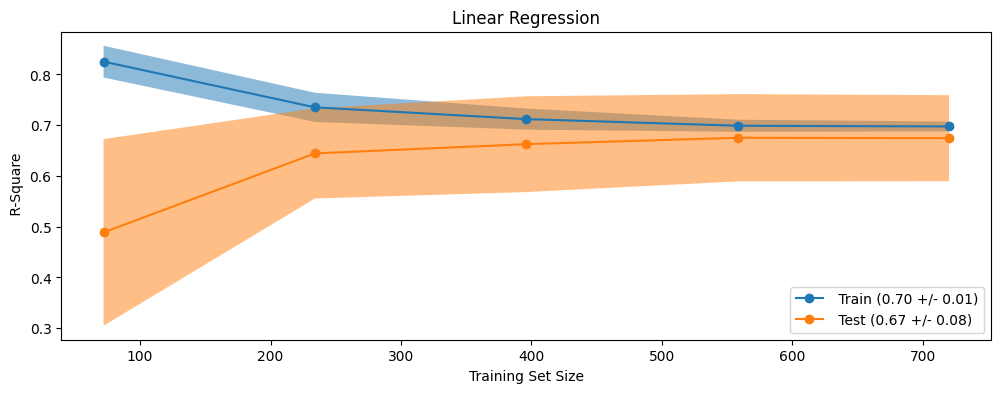

[[ 9.26734030e-05 -2.75552591e-02 -6.11776529e-03 -9.60102122e-03
  -7.82514535e-03 -6.25480882e-02 -2.00696974e-01 -2.34485935e-01
  -3.03758896e-02 -8.59931571e-02]
 [ 2.32631920e-03 -5.30499675e-03 -4.28661410e-02 -2.20855596e-01
  -2.60209592e-02 -3.22966472e-02 -5.38242740e-02 -1.26944396e-01
  -3.08736060e-02 -1.57555022e-02]
 [-1.06017698e-02  3.65965672e-03 -1.52220622e-02 -2.69986051e-01
  -2.91679422e-03 -2.26387417e-02 -7.70304090e-02 -6.68408186e-02
  -2.97648504e-02  2.18100356e-03]
 [-1.11929551e-02  5.37731453e-03 -1.44243057e-02 -1.48334000e-01
   2.26188686e-03 -1.58633574e-02 -1.23576863e-01 -4.10940649e-02
  -5.29882524e-02  3.36765823e-03]
 [-7.89370602e-03  8.68298727e-03 -1.55383525e-02 -1.87927682e-01
  -6.82795277e-04 -1.23376271e-02 -7.59073873e-02 -9.51764913e-03
  -4.96680449e-02  1.40845903e-03]]


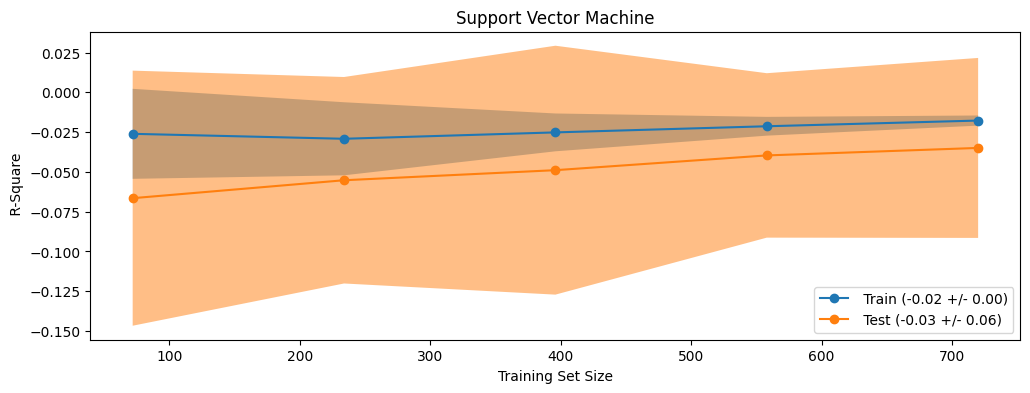

[[0.45832576 0.73917455 0.48411907 0.53436197 0.63209653 0.53674053
  0.53314036 0.63313311 0.52743188 0.52484389]
 [0.76359779 0.77389039 0.50440178 0.74637535 0.71243918 0.64281631
  0.66959854 0.77053205 0.69319163 0.72902936]
 [0.76854832 0.76709616 0.42795131 0.76306573 0.56039338 0.76501127
  0.74587916 0.75963002 0.75793236 0.77296141]
 [0.79294482 0.77900072 0.44651204 0.81356265 0.52153286 0.76168815
  0.75829773 0.79092229 0.78186761 0.79253209]
 [0.80647418 0.82872102 0.53702619 0.81646838 0.80559076 0.73844229
  0.78577234 0.77813778 0.81347529 0.79022572]]


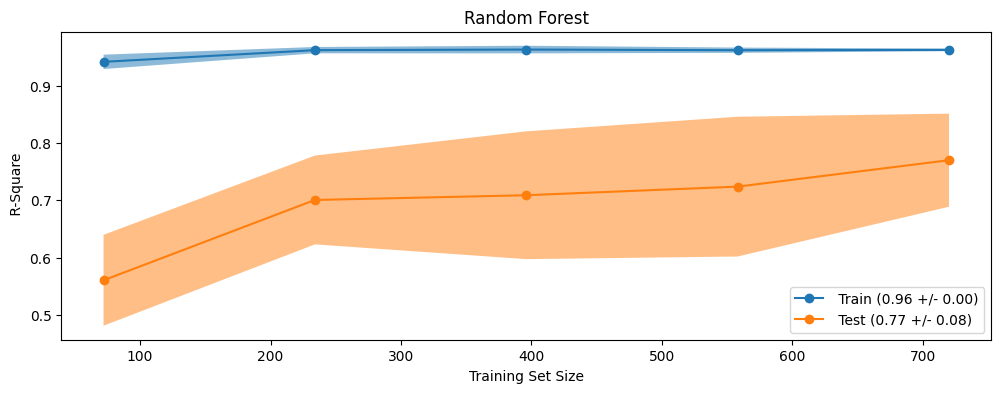

[[0.51850629 0.71322584 0.40524787 0.46412402 0.21022278 0.57537258
  0.413504   0.55152678 0.49941373 0.54253387]
 [0.72927755 0.72724086 0.50951207 0.70353657 0.6875627  0.70181024
  0.64825678 0.80989587 0.73083985 0.68167692]
 [0.76380253 0.73401046 0.37992322 0.70067096 0.32115018 0.72713983
  0.72049642 0.76401532 0.77496457 0.73717868]
 [0.78289706 0.78942907 0.38231605 0.70549011 0.40209228 0.7397576
  0.75694996 0.79680312 0.75491381 0.78432935]
 [0.77526832 0.85001767 0.47938633 0.75121546 0.82363319 0.70459062
  0.76134521 0.77502024 0.8010453  0.80069518]]


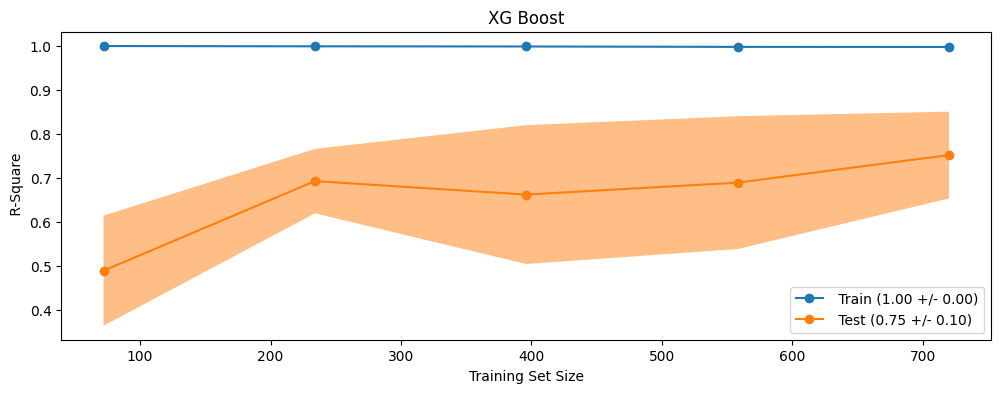

[[ 0.47472961  0.63804614  0.14661973  0.3906746  -0.61967104  0.55995988
   0.30975131  0.26973571  0.33984744  0.31708177]
 [ 0.6654947   0.67628566  0.42792679  0.46532402 -0.22144311  0.47721032
   0.60281423  0.65589729  0.43685814  0.54141109]
 [ 0.74023545  0.64465415  0.24338963  0.54166889 -0.33268932  0.71729619
   0.60520422  0.70793736  0.57029788  0.24825248]
 [ 0.71137419  0.57642292  0.21545705  0.57688178  0.00994388  0.58894092
   0.53807847  0.72692961  0.66388808  0.56106247]
 [ 0.67303587  0.76814996  0.3272836   0.52802825  0.60141102  0.54484786
   0.62790105  0.73948867  0.63467628  0.59656374]]


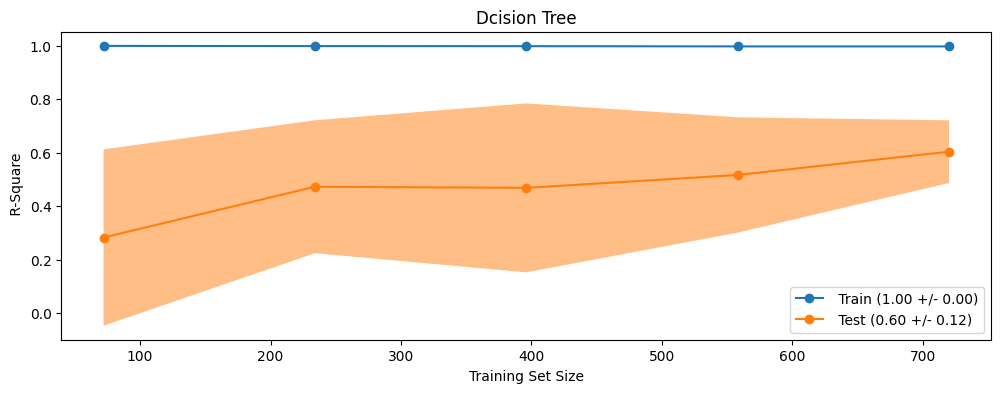

[[0.42462757 0.76135131 0.47867325 0.57407718 0.51855232 0.5934969
  0.49624365 0.69750965 0.59337841 0.60127397]
 [0.73815816 0.77591224 0.4873427  0.74972941 0.76381652 0.63574344
  0.66395479 0.82462331 0.70486855 0.71468266]
 [0.78328979 0.79703952 0.43327028 0.77342829 0.45624747 0.75140848
  0.71623313 0.82432083 0.76659141 0.69803928]
 [0.7943735  0.79014563 0.45223662 0.78329695 0.79413522 0.78310462
  0.73888302 0.84146751 0.76476617 0.66734438]
 [0.78968389 0.81887751 0.52751221 0.8028534  0.81045919 0.75190562
  0.74521604 0.83582433 0.80659315 0.78882336]]


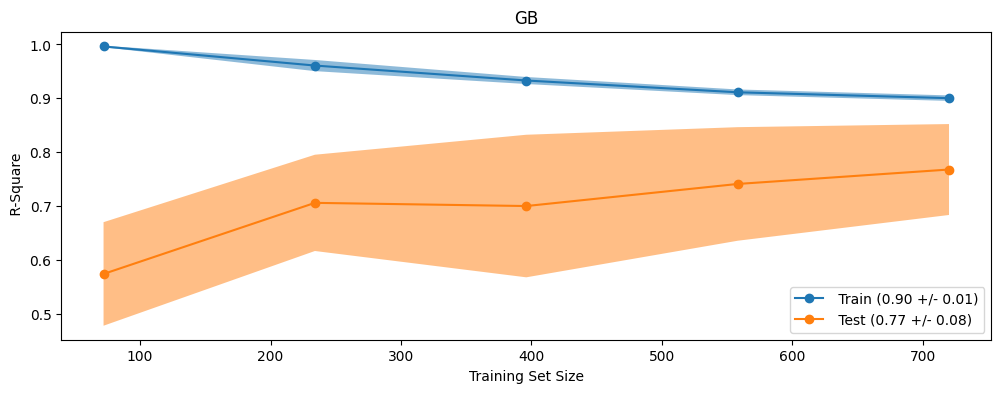

[[0.56003818 0.6369499  0.49409509 0.48500444 0.24774968 0.47962154
  0.06515198 0.65843102 0.56208161 0.69748036]
 [0.74209134 0.7448231  0.5144025  0.62594028 0.6771998  0.53616785
  0.55036868 0.75432921 0.58899563 0.70034137]
 [0.74285393 0.77409236 0.49332603 0.63773461 0.69427925 0.5512627
  0.5507798  0.78374601 0.64771174 0.72198437]
 [0.76471551 0.78000206 0.51829059 0.63674497 0.70253678 0.56639374
  0.60509198 0.78085554 0.65150469 0.71096841]
 [0.75699995 0.77211077 0.52535594 0.64363607 0.7158747  0.54635245
  0.60739875 0.77465329 0.65412559 0.70987379]]


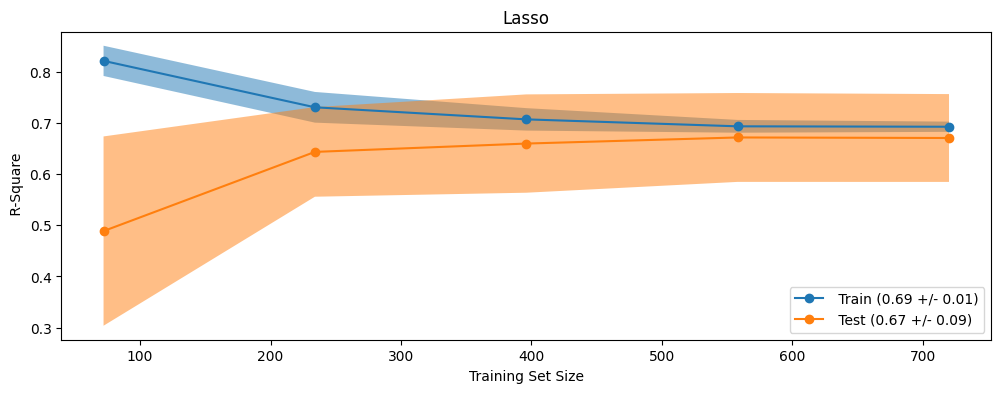

[[0.47625213 0.69603281 0.50878257 0.49475733 0.45186377 0.48063732
  0.15200175 0.69631131 0.55709885 0.69532935]
 [0.73154541 0.74635789 0.47571902 0.62326891 0.6746509  0.53474073
  0.57895016 0.75735485 0.59550218 0.70294692]
 [0.73423993 0.77468742 0.47841394 0.64274354 0.69513067 0.55362792
  0.56937484 0.78485323 0.64758334 0.72199697]
 [0.75581092 0.78096544 0.50261205 0.63891704 0.70286723 0.56764959
  0.60756071 0.78133552 0.65166855 0.71000357]
 [0.75234249 0.7733164  0.51324202 0.64594153 0.71596889 0.54754461
  0.61090661 0.7756871  0.65262862 0.7100438 ]]


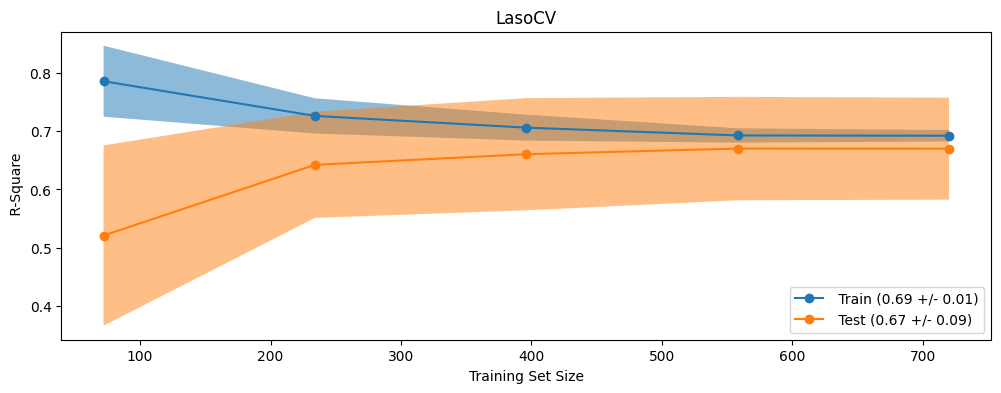

[[0.58171561 0.6928853  0.49434574 0.50457852 0.38573832 0.49764465
  0.34847171 0.68374361 0.54518217 0.70603522]
 [0.73350485 0.74930547 0.50731848 0.62663168 0.68204005 0.53544772
  0.55953729 0.7564758  0.60265386 0.70122638]
 [0.73821794 0.77407895 0.48921869 0.64112196 0.69599983 0.5526746
  0.55565231 0.78460768 0.6472898  0.72193938]
 [0.76061015 0.77991571 0.51509679 0.63980858 0.70443629 0.56560784
  0.60670229 0.78129896 0.65084697 0.71113239]
 [0.75396233 0.77220995 0.52287265 0.64634074 0.71681316 0.54458501
  0.60906685 0.77524329 0.65231727 0.71002832]]


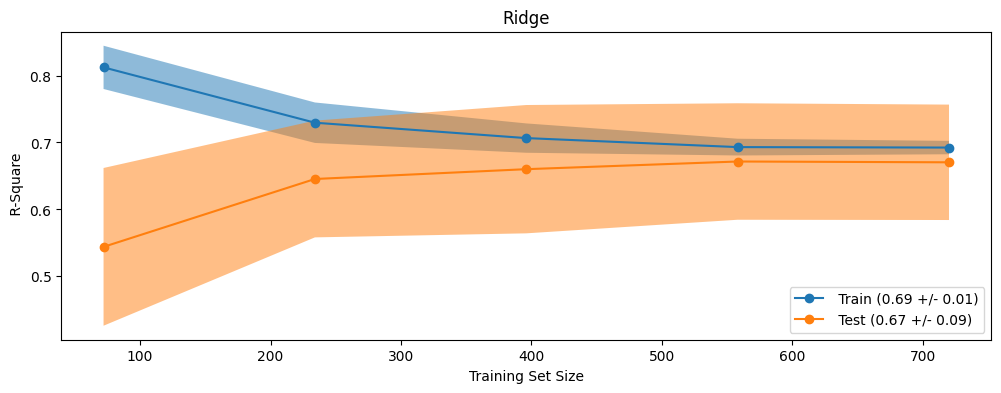

[[0.58171561 0.6928853  0.49434574 0.50457852 0.38573832 0.49764465
  0.12827754 0.6570093  0.54518217 0.70603522]
 [0.73350485 0.7419602  0.5222683  0.61771289 0.68193372 0.53544772
  0.55953729 0.75831519 0.58099097 0.70122638]
 [0.75500544 0.77150152 0.50343085 0.62750689 0.70098186 0.55246697
  0.55565231 0.78601254 0.65200688 0.71882741]
 [0.77995097 0.77688192 0.52962571 0.62644376 0.7097129  0.56766784
  0.61934021 0.78254299 0.65072328 0.71106627]
 [0.77248898 0.7678453  0.5368451  0.63150224 0.7197671  0.54663734
  0.62249073 0.77702984 0.66018389 0.70983892]]


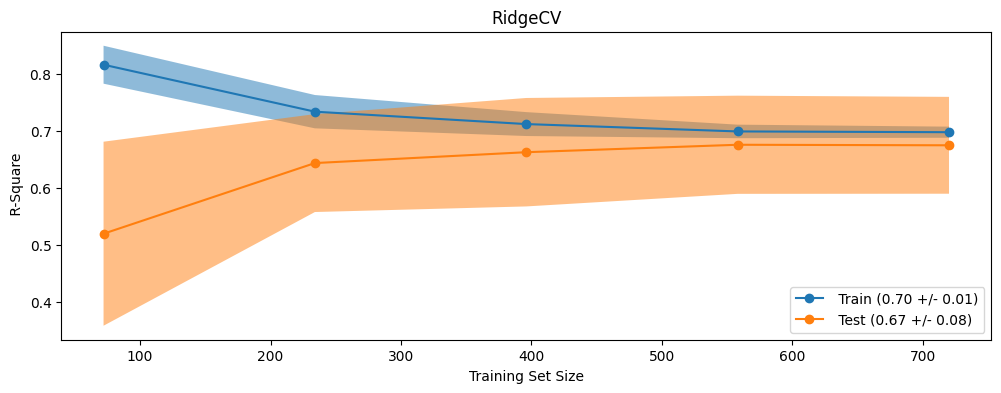

In [113]:
# iterate orver all the algos
for name, algo in algos.items():
    plot_learning_curve( name, algo)

# 6. ModelTraining

In [115]:
model = Pipeline(steps = [
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=10))
])

In [116]:
model.fit(X_data, y_data)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'dest...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

# 7. Evaluate Model

In [124]:
type(model[1])

sklearn.ensemble._forest.RandomForestRegressor

In [117]:
def evaluate_model(model, X, y):
    y_pred= model.predict(X)
    return type(model).__name__ , r2_score(y, y_pred)

In [127]:
print(f' R2 Score of Model on Train data is {evaluate_model(model, X_data, y_data)}') 

 R2 Score of Model on Train data is 0.9460526113928734


In [126]:
print(f' R2 Score of Model on Test Data is {evaluate_model(model, X_test, y_test)}') 

 R2 Score of Model on Test Data is 0.7520926526783145


# 8. Model Persistance

In [128]:
joblib.dump(model,'rf_model.joblib')

['rf_model.joblib']

# 9. Load Model

In [129]:
model_loaded= joblib.load('rf_model.joblib')

In [130]:
model_loaded

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['duration', 'total_stops']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['airline', 'source',
                                                   'dest...
                                                                                                         'day_of_month'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   DatetimeFeatures(features_to_extract=['hour',
                                                                                                         'minute'],
                                                                                    format='mixed')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [131]:
print(f' R2 Score of Loaded Model on Test Data is {evaluate_model(model_loaded, X_test, y_test)}') 

 R2 Score of Loaded Model on Test Data is 0.7520926526783145
